# US Flight data analysis - Part 1
1. Load data into Pandas DataFrames using pixiedust.sampleData()
2. Create a networkx DiGraph from the flights DataFrame
3. Augment the airports DataFrame with columns that compute the different centrality indices
4. Visualize airports using networkx drawing APIs and pixiedust display() Mapbox Map
5. Compute the Dikjstra shorted path between 2 airports using ELAPSED_TIME and the centrality indices as weight

## Install networkx library if needed

In [3]:
#!pip install networkx

## Import the modules at the start

In [1]:
import pixiedust
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

Pixiedust database opened successfully


## Load airports

In [2]:
airports = pixiedust.sampleData("https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airports.csv")

Downloaded 23867 bytes
Creating pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airports.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airports.csv'


## Load airlines

In [3]:
airlines = pixiedust.sampleData("https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airlines.csv")

Downloaded 359 bytes
Creating pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airlines.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airlines.csv'


## Load flights

In [4]:
flights = pixiedust.sampleData("https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/flights.zip")

Extracting first item in zip file...
File extracted: flights.csv
Downloaded 75438025 bytes
Creating pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/flights.zip'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/flights.zip'


## Explore the flights

In [171]:
display(flights)

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_DELAY,CANCELLED
2015,4,28,2,DL,2668,LGA,BOS,-2.0,66.0,38.0,184,-7.0,0
2015,2,7,6,MQ,3609,EVV,DFW,-1.0,106.0,92.0,642,-31.0,0
2015,6,27,6,US,412,BOI,PHX,-5.0,121.0,100.0,735,-6.0,0
2015,12,8,2,B6,1094,AUS,JFK,27.0,202.0,182.0,1521,17.0,0
2015,11,23,1,AS,574,PDX,LAX,-7.0,135.0,116.0,834,-17.0,0
2015,9,9,3,NK,200,IAH,ORD,-3.0,149.0,118.0,925,-15.0,0
2015,9,28,1,UA,1027,DEN,MSY,1.0,147.0,131.0,1062,-6.0,0
2015,4,22,3,AA,2361,ORD,DCA,-7.0,101.0,77.0,612,-18.0,0
2015,4,21,2,B6,1243,DCA,CHS,7.0,95.0,75.0,444,4.0,0
2015,4,10,5,WN,1014,MDW,BOS,-3.0,150.0,100.0,861,12.0,0


## Create a networkx graph from the flights DataFrame

In [6]:
edges = flights.groupby(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])[["ELAPSED_TIME"]].mean()
edges

ELAPSED_TIME
ORIGIN_AIRPORT DESTINATION_AIRPORT              
ABE            ATL                    127.415350
               DTW                    101.923741
               ORD                    130.298762
ABI            DFW                     53.951591
ABQ            ATL                    174.822278
               BWI                    215.028112
               CLT                    193.168421
               DAL                     95.107051
               DEN                     75.268199
               DFW                    103.641714
               HOU                    115.464363
               IAH                    125.548387
               JFK                    232.306273
               LAS                     88.696897
               LAX                    120.412549
               MCI                    106.373802
               MCO                    213.412371
               MDW                    155.709375
               MSP                    147.079070
               OAK                    140.355612
               ORD                    163.952919
               PDX                    164.737991
               PHX                     77.266639
               SAN                    105.137480
               SEA                    182.432099
               SFO                    157.303030
               SLC                     93.917460
ABR            MSP                     69.577677
ABY            ATL                     54.341801
ACK            BOS                     44.504348
...                                          ...
TYS            EWR                    115.358108
               IAD                     86.333333
               IAH                    142.137748
               LEX                           NaN
               LGA                    117.721311
               ORD                    106.696127
UST            IAD                    108.333333
               TTN                    123.751773
VEL            SLC                     48.215000
VLD            ATL                     63.770811
VPS            ATL                     70.170242
               DFW                    132.716329
               IAH                    112.542857
WRG            KTN                     32.663580
               PSG                     23.658462
WYS            SLC                     64.942308
XNA            ATL                    104.153055
               CVG                    100.508021
               DEN                    122.288462
               DFW                     78.007473
               EWR                    176.908213
               IAH                    103.303146
               LGA                    168.770833
               MSP                    116.766376
               ORD                    107.308907
               SFO                    249.901961
               SLC                    155.000000
YAK            CDV                     49.193846
               JNU                     45.956923
YUM            PHX                     57.270227

[4693 rows x 1 columns]

## Reset the index for the airports DataFrame

In [7]:
edges = edges.reset_index()
edges

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ELAPSED_TIME
0,ABE,ATL,127.415350
1,ABE,DTW,101.923741
2,ABE,ORD,130.298762
3,ABI,DFW,53.951591
4,ABQ,ATL,174.822278
5,ABQ,BWI,215.028112
6,ABQ,CLT,193.168421
7,ABQ,DAL,95.107051
8,ABQ,DEN,75.268199
9,ABQ,DFW,103.641714


## Create a Directed Graph from the flights

In [8]:
flight_graph = nx.from_pandas_edgelist(
    flights, "ORIGIN_AIRPORT","DESTINATION_AIRPORT", "ELAPSED_TIME", 
    create_using = nx.DiGraph() )

## Visualize the graph using a random layout

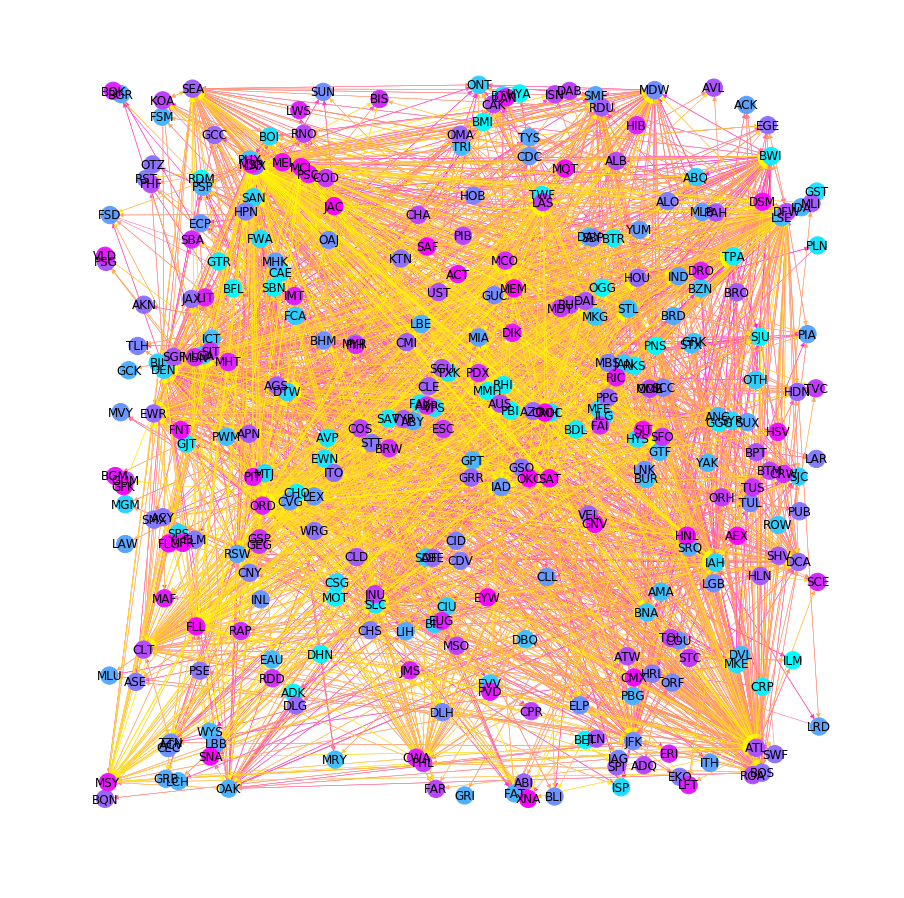

In [11]:
import matplotlib.cm as cm
fig = plt.figure(figsize = (12,12))
nx.draw(flight_graph, arrows=True, with_labels=True, width = 0.5,style="dotted",
        node_color=range(len(flight_graph)), cmap=cm.get_cmap(name="cool"),
        edge_color=range(len(flight_graph.edges)), edge_cmap=cm.get_cmap(name="spring"),
        pos = nx.random_layout(flight_graph)
       )
plt.show()

## Augment the airports DataFrame with DEGREE centrality index

In [14]:
degree_df = pd.DataFrame([{"IATA_CODE":k, "DEGREE":v} for k,v in flight_graph.degree], columns=["IATA_CODE", "DEGREE"])

In [24]:
airports_centrality = pd.merge(airports, degree_df, on='IATA_CODE')

In [25]:
airports_centrality

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,DEGREE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,7
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,2
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,46
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,2
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,2
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018,6
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052,2
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862,2
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717,20
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603,2


## Display a MapBox box of the airports

In [26]:
display(airports_centrality)

## Compute the centrality for PAGE_RANK, CLOSENESS and BETWEENNESS and add the computed values as columns to the airport DataFrame

In [56]:
from six import iteritems
def compute_centrality(g, centrality_df, compute_fn, col_name, *args, **kwargs): 
    # create a temporary DataFrame that contains the computed centrality values
    temp_df = pd.DataFrame(
        [{"IATA_CODE":k, col_name:v} for k,v in iteritems(compute_fn(g, *args, **kwargs))], 
        columns=["IATA_CODE", col_name]
    )
    # make sure to remove the col_name from the centrality_df is already there
    if col_name in centrality_df.columns:
        centrality_df.drop([col_name], axis=1, inplace=True)
    # merge the 2 DataFrame on the IATA_CODE column
    centrality_df = pd.merge(centrality_df, temp_df, on='IATA_CODE')
    return centrality_df

In [58]:
airports_centrality = compute_centrality(flight_graph, airports_centrality, nx.pagerank, "PAGE_RANK")
airports_centrality = compute_centrality(flight_graph, airports_centrality, nx.closeness_centrality, "CLOSENESS")
airports_centrality = compute_centrality(
    flight_graph, airports_centrality, nx.betweenness_centrality, "BETWEENNESS", k = len(flight_graph))
airports_centrality

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,DEGREE,PAGE_RANK,CLOSENESS,BETWEENNESS
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,7,0.001152,0.423483,0.000000e+00
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,2,0.000667,0.392901,0.000000e+00
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,46,0.004145,0.497674,6.023268e-05
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,2,0.000647,0.379433,0.000000e+00
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,2,0.000655,0.402760,0.000000e+00
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018,6,0.000912,0.362302,0.000000e+00
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052,2,0.000667,0.392901,0.000000e+00
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862,2,0.000638,0.362712,0.000000e+00
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717,20,0.002094,0.432615,1.968172e-05
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603,2,0.000753,0.337539,0.000000e+00


## Get the top 10 airports according to each centrality indices

In [74]:
for col_name in ["DEGREE", "PAGE_RANK", "CLOSENESS", "BETWEENNESS"]:
    print("{} : {}".format(
        col_name, 
        airports_centrality.nlargest(10, col_name)["IATA_CODE"].values)
    )

DEGREE : ['ATL' 'ORD' 'DFW' 'DEN' 'MSP' 'IAH' 'DTW' 'SLC' 'EWR' 'LAX']
PAGE_RANK : ['ATL' 'ORD' 'DFW' 'DEN' 'MSP' 'IAH' 'DTW' 'SLC' 'SFO' 'LAX']
CLOSENESS : ['ATL' 'ORD' 'DFW' 'DEN' 'MSP' 'IAH' 'DTW' 'SLC' 'EWR' 'LAX']
BETWEENNESS : ['ATL' 'DFW' 'ORD' 'DEN' 'MSP' 'SLC' 'DTW' 'ANC' 'IAH' 'SFO']


## Visualize the graph for the top airport (ATL) and its immediate neighbors

In [112]:
import matplotlib.cm as cm
def visualize_neighbors(parent_node):
    fig = plt.figure(figsize = (12,12))
    # Create a subgraph and add an edge from the parents node to all its neighbors
    graph = nx.DiGraph()
    for neighbor in flight_graph.neighbors(parent_node):
        graph.add_edge(parent_node, neighbor)
    # draw the subgraph
    nx.draw(graph, arrows=True, with_labels=True, width = 0.5,style="dotted",
            node_color=range(len(graph)), cmap=cm.get_cmap(name="cool"),
            edge_color=range(len(graph.edges)), edge_cmap=cm.get_cmap(name="spring"),
           )
    plt.show()

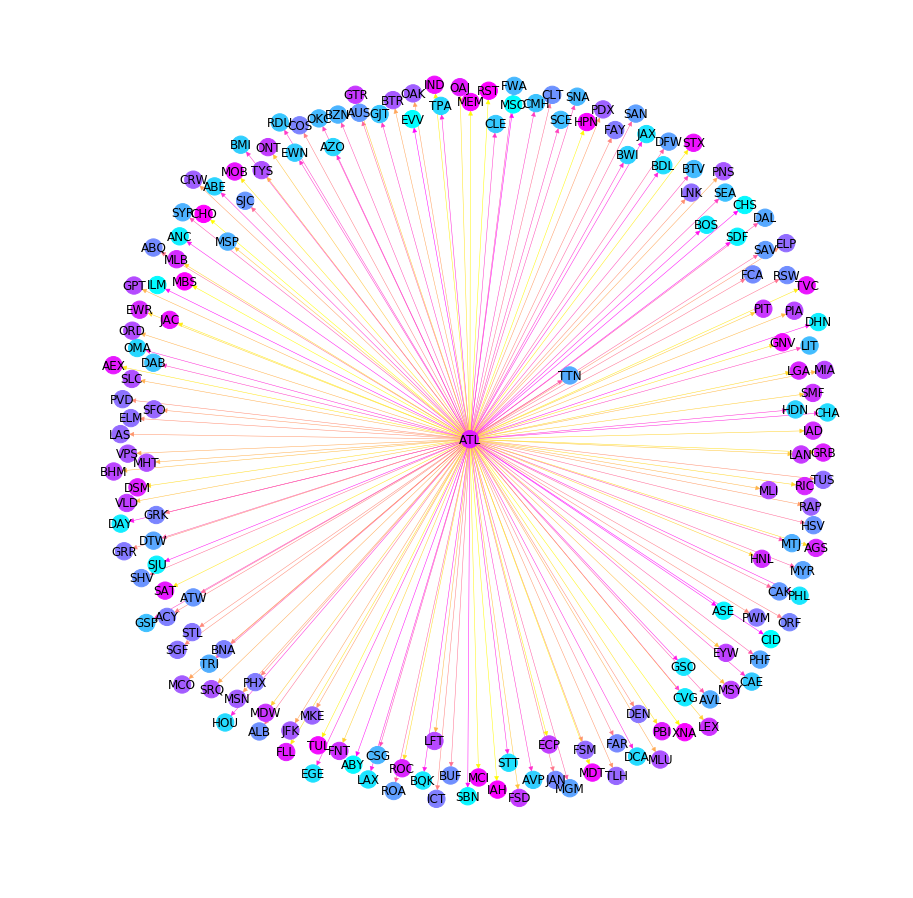

In [113]:
visualize_neighbors("ATL")

## Compute the Dikjstra shortest path using ELAPSED_TIME as the weight

In [169]:
nx.dijkstra_path(flight_graph, "BOS", "PSC", weight="ELAPSED_TIME")

['BOS', 'MSP', 'PSC']

## Compute the Dijkstra shortest path using the different centrality indices

In [173]:
# use a cache so we don't recompute the weight for the same airport every time
cache = {}
def compute_weight(centrality_indice_col):
    # wrapper function that conform to the dijkstra weight argument
    def wrapper(source, target, attribute):
        # try the cache first and compute the weight if not there
        source_weight = cache.get(source, None)
        if source_weight is None:
            # look up the airports_centrality for the value
            source_weight = airports_centrality.loc[airports_centrality["IATA_CODE"] == source][centrality_indice_col].values[0]
            cache[source] = source_weight
        target_weight = cache.get(target, None)
        if target_weight is None:
            target_weight = airports_centrality.loc[airports_centrality["IATA_CODE"] == target][centrality_indice_col].values[0]
            cache[target] = target_weight
        # Return weight is inversely proportional to the computed weighted since the 
        # Dijkstra algorithm give precedence to shorter distances
        return float(1/source_weight) + float(1/target_weight)
    return wrapper

In [163]:
for col_name in ["DEGREE", "PAGE_RANK", "CLOSENESS"]:
    #clear the cache
    cache.clear()
    print("{} : {}".format(
        col_name,
        nx.dijkstra_path(flight_graph, "BOS", "PSC", weight=compute_weight(col_name))
    ))

DEGREE : ['BOS', 'DEN', 'PSC']
PAGE_RANK : ['BOS', 'DEN', 'PSC']
CLOSENESS : ['BOS', 'DEN', 'PSC']
